In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

price_data_file = "Demographic Data/Neighborhood_Data.csv"
price_df = pd.read_csv(price_data_file)
price_df

#remove Median columns and rows that have 0 in any of the Means
price_df = price_df.drop([25,26,27,28], axis=0)
del price_df['Median 2015'], price_df['Median 2016'], price_df['Median 2017'], price_df['Median 2018']
price_df

,Zip Codes,Borough,Neighborhood,Mean 2015,Mean 2016,Mean 2017,Mean 2018
0,11206,Brooklyn,Bushwick and Williamsburg,102.391970,94.994238,94.821426,96.825835
1,11221,Brooklyn,Bushwick and Williamsburg,95.713076,89.587325,88.334267,87.629931
2,11237,Brooklyn,Bushwick and Williamsburg,91.916442,86.114981,80.728763,79.219594
3,11216,Brooklyn,Central Brooklyn,111.900207,110.022522,107.358035,110.636435
4,11238,Brooklyn,Central Brooklyn,144.082211,138.259867,135.210127,137.844509
5,10027,Manhattan,Central Harlem,128.709048,121.078350,135.229297,135.707509
6,10011,Manhattan,Chelsea and Clinton,242.854346,225.796277,225.691729,235.382632
7,10019,Manhattan,Chelsea and Clinton,229.525049,215.508512,215.059272,228.574660
8,10036,Manhattan,Chelsea and Clinton,218.437125,212.077208,213.932102,215.999462
9,10029,Manhattan,East Harlem,126.461440,127.426550,129.885366,140.572068


In [7]:
#Find Mean price for each year and put into new dataframe 
mean_2015 = price_df.groupby("Neighborhood")['Mean 2015'].mean()
mean_2016 = price_df.groupby("Neighborhood")['Mean 2016'].mean()
mean_2017 = price_df.groupby("Neighborhood")['Mean 2017'].mean()
mean_2018 = price_df.groupby("Neighborhood")['Mean 2018'].mean()

neighborhood_price = pd.DataFrame({
    'Mean 2015':mean_2015,
    'Mean 2016':mean_2016,
    'Mean 2017':mean_2017,
    'Mean 2018':mean_2018,
})

#Transpose columns and rows to prepare data for plotting
neighborhood_trans = neighborhood_price.T
neighborhood_trans

Neighborhood,Bushwick and Williamsburg,Central Brooklyn,Central Harlem,Chelsea and Clinton,East Harlem,Flatbush,Gramercy Park and Murray Hill,Greenpoint,Greenwich Village and Soho,Inwood and Washington Heights,Lower East Side,Northwest Brooklyn,Upper West Side
Mean 2015,96.673829,127.991209,128.709048,230.272173,126.461440,92.680582,237.572914,145.712109,253.860292,104.395633,193.502639,164.761000,209.100374
Mean 2016,90.232181,124.141194,121.078350,217.793999,127.426550,84.754190,214.245595,136.195679,234.945388,99.883374,184.260796,156.174149,191.194522
Mean 2017,87.961485,121.284081,135.229297,218.227701,129.885366,85.103783,215.009782,134.947242,234.414585,95.558082,187.059027,149.772995,192.987728
Mean 2018,87.891787,124.240472,135.707509,226.652251,140.572068,85.033461,219.999161,141.255819,241.926452,98.003266,188.286289,149.977759,193.026397


In [8]:
#pick neighborhoods with relatively high and low prices 
neighborhood_filtered = neighborhood_trans[[
    'Greenwich Village and Soho',
    'Gramercy Park and Murray Hill',
    'Chelsea and Clinton',
    'Bushwick and Williamsburg',
    'Flatbush',
    'Inwood and Washington Heights'
]]

neighborhood_filtered.head()

Neighborhood,Greenwich Village and Soho,Gramercy Park and Murray Hill,Chelsea and Clinton,Bushwick and Williamsburg,Flatbush,Inwood and Washington Heights
Mean 2015,253.860292,237.572914,230.272173,96.673829,92.680582,104.395633
Mean 2016,234.945388,214.245595,217.793999,90.232181,84.754190,99.883374
Mean 2017,234.414585,215.009782,218.227701,87.961485,85.103783,95.558082
Mean 2018,241.926452,219.999161,226.652251,87.891787,85.033461,98.003266


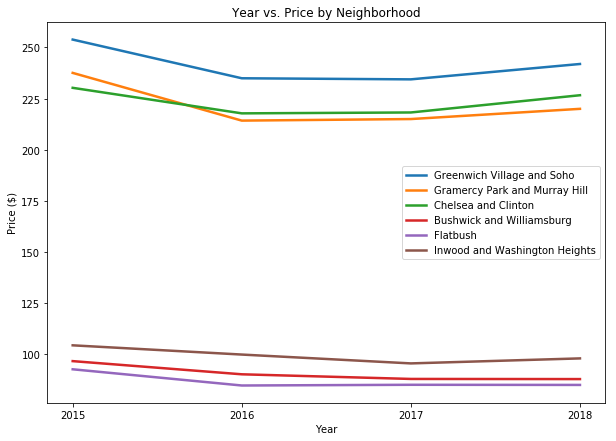

In [52]:
#create line graph of price trends for each neighborhood
plt.figure(figsize=(10,7))
x_axis = np.arange(4)
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations,[2015,2016,2017,2018])

plt.plot(x_axis, neighborhood_filtered, linewidth=2.5)
plt.legend([
    'Greenwich Village and Soho',
    'Gramercy Park and Murray Hill',
    'Chelsea and Clinton',
    'Bushwick and Williamsburg',
    'Flatbush',
    'Inwood and Washington Heights'
], loc='best')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.title('Year vs. Price by Neighborhood')
plt.savefig("Images/YearVsPriceNeighborhood.png")

In [10]:
demographic_data_file = 'Demographic Data/Neighborhood_Demographics.csv'
demo_df = pd.read_csv(demographic_data_file)

#filter for desired neighborhoods, clean up data
demo_df = demo_df.drop([1,2,4,7,10,11,12], axis=0)
del demo_df['GeoID'], demo_df['Total Pop.1']
demo_df = demo_df.rename(columns={"GeogName":"Neighborhood",'Total Pop':'Total Population','Median':'Median Age'})
demo_df

,Neighborhood,Borough,Total Population,Male,Female,<5,5-9,10-14,15-19,20-24,...,>65 Female,Hispanic,Non Hispanic,White,Black,Native American,Asian,Hawaiian/PI,Other,Two or More
0,Bushwick and Williamsburg,Brooklyn,169604,85104,84500,15148,12621,11593,10904,17452,...,8164,84947,84657,49668,26063,184,6669,11,369,1693
3,Chelsea and Clinton,Manhattan,121498,64611,56887,4194,2851,2249,2709,9300,...,7825,19426,102072,73650,6939,131,18120,12,709,2511
5,Flatbush,Brooklyn,108653,50284,58369,8266,7320,6798,6347,8293,...,6938,20589,88064,24359,49067,61,11129,11,974,2463
6,Gramercy Park and Murray Hill,Manhattan,75660,34622,41038,2776,1269,1505,3600,7241,...,5792,7819,67841,49084,3094,197,13147,0,255,2064
8,Greenwich Village and Soho,Manhattan,42979,21369,21610,2164,2096,1538,1532,3289,...,2847,2839,40140,28050,1023,43,9281,0,125,1618
9,Inwood and Washington Heights,Manhattan,218680,107355,111325,12571,10236,9751,11573,18467,...,16282,153384,65296,38922,17086,63,5897,95,584,2649


In [11]:
#separate data into demographic types ie. age and ethnicity and create respective visualizations 
age_df = demo_df[[
    'Neighborhood',
    '<5','5-9','10-14', '15-19',
    '20-24','25-29','30-34',
    '35-39','40-44','45-49',
    '50-54','55-59','60-64',
    '65-69','70-74','75-79',
    '80-84','>85'
]]
age_df = age_df.set_index('Neighborhood')

#create more specific age categories
less19 = []
between20_39 = []
between40_64 = []
older65 = []
neighborhoods = ['Greenwich Village and Soho','Gramercy Park and Murray Hill','Chelsea and Clinton',
    'Bushwick and Williamsburg','Flatbush','Inwood and Washington Heights']

for index,row in age_df.iterrows():
    less_19 = row['<5'] + row['5-9'] + row['10-14'] + row['15-19']
    between_20_39 = row['20-24'] + row['25-29'] + row['30-34'] + row['35-39'] 
    between_40_64 = row['40-44'] + row['45-49'] + row['50-54'] + row['55-59'] + row['60-64']
    older_65 = row['65-69'] + row['70-74'] + row['75-79'] + row['80-84'] + row['>85']
    less19.append(less_19) 
    between20_39.append(between_20_39)
    between40_64.append(between_40_64)
    older65.append(older_65)

compiled_ages = pd.DataFrame({
    "Neighborhood":neighborhoods,
    'Less than 19':less19,
    '20-39':between20_39,
    '40-64':between40_64,
    '65 and Older':older65
})

compiled_ages

,Neighborhood,Less than 19,20-39,40-64,65 and Older
0,Greenwich Village and Soho,50266,65172,40268,13898
1,Gramercy Park and Murray Hill,12003,54021,41535,13939
2,Chelsea and Clinton,28731,35471,32749,11702
3,Bushwick and Williamsburg,9150,35672,20656,10182
4,Flatbush,7330,17259,13426,4964
5,Inwood and Washington Heights,44131,79711,67472,27366


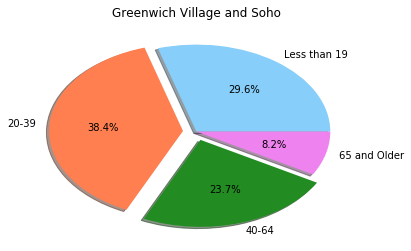

In [54]:
#plot age demographic pie charts
#plot Greenwich Village and Soho pie chart
compiled_ages_trans = compiled_ages.set_index('Neighborhood').T
compiled_ages_trans
labels = ['Less than 19','20-39','40-64','65 and Older']
sizes = compiled_ages_trans['Greenwich Village and Soho']
colors = ['lightskyblue','coral','forestgreen','violet']
explode = [0,0.1,0.1,0]

plt.pie(sizes, explode = explode, labels = labels, colors=colors,autopct="%1.1f%%", shadow = True)
plt.title('Greenwich Village and Soho')
plt.savefig("Images/GreenwichSohoAge")

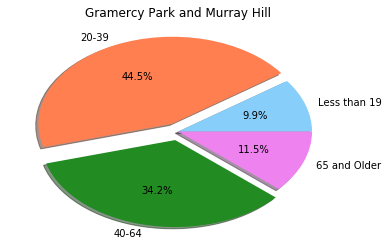

In [55]:
#plot Gramercy Park and Murray Hill pie chart
sizes = compiled_ages_trans['Gramercy Park and Murray Hill']
plt.pie(sizes, explode = explode, labels = labels, colors=colors,autopct="%1.1f%%", shadow = True)
plt.title('Gramercy Park and Murray Hill')
plt.savefig("Images/GramercyMurrayAge")

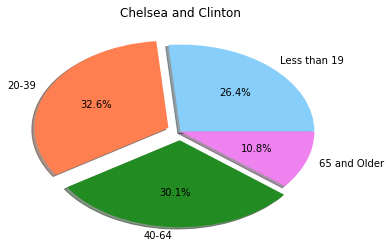

In [56]:
#plot Chelsea and Clinton pie chart
sizes = compiled_ages_trans['Chelsea and Clinton']
plt.pie(sizes, explode = explode, labels = labels, colors=colors,autopct="%1.1f%%", shadow = True)
plt.title('Chelsea and Clinton')
plt.savefig("Images/ChelseaClintonAge")

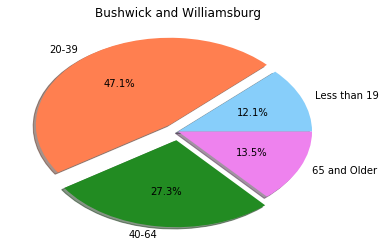

In [57]:
#plot Bushwick and Williamsburg pie chart
sizes = compiled_ages_trans['Bushwick and Williamsburg']
plt.pie(sizes, explode = explode, labels = labels, colors=colors,autopct="%1.1f%%", shadow = True)
plt.title('Bushwick and Williamsburg')
plt.savefig("Images/BushWillAge")

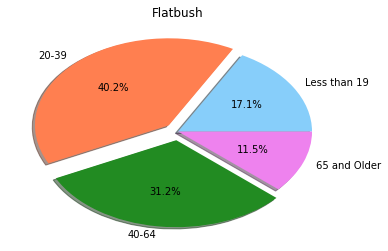

In [59]:
#plot Flatbush pie chart
sizes = compiled_ages_trans['Flatbush']
plt.pie(sizes, explode = explode, labels = labels, colors=colors,autopct="%1.1f%%", shadow = True)
plt.title('Flatbush')
plt.savefig("Images/FlatbushAge")

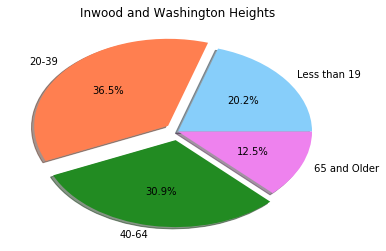

In [60]:
#plot Inwood and Washington Heights pie chart
sizes = compiled_ages_trans['Inwood and Washington Heights']
plt.pie(sizes, explode = explode, labels = labels, colors=colors,autopct="%1.1f%%", shadow = True)
plt.title('Inwood and Washington Heights')
plt.savefig("Images/InWashAge")

In [18]:
median_age = demo_df[[
    'Neighborhood',
    'Borough',
    'Total Population',
    'Median Age'
]]
median_age = median_age.reindex([0,5,9,6,8,3])

#reorder original filtered neighborhood dataframe to fit plotting
reordered_means = neighborhood_trans[[
    'Bushwick and Williamsburg',
    'Flatbush',
    'Inwood and Washington Heights',
    'Gramercy Park and Murray Hill',
    'Greenwich Village and Soho',
    'Chelsea and Clinton'
]]
reordered_means

Neighborhood,Bushwick and Williamsburg,Flatbush,Inwood and Washington Heights,Gramercy Park and Murray Hill,Greenwich Village and Soho,Chelsea and Clinton
Mean 2015,96.673829,92.680582,104.395633,237.572914,253.860292,230.272173
Mean 2016,90.232181,84.754190,99.883374,214.245595,234.945388,217.793999
Mean 2017,87.961485,85.103783,95.558082,215.009782,234.414585,218.227701
Mean 2018,87.891787,85.033461,98.003266,219.999161,241.926452,226.652251


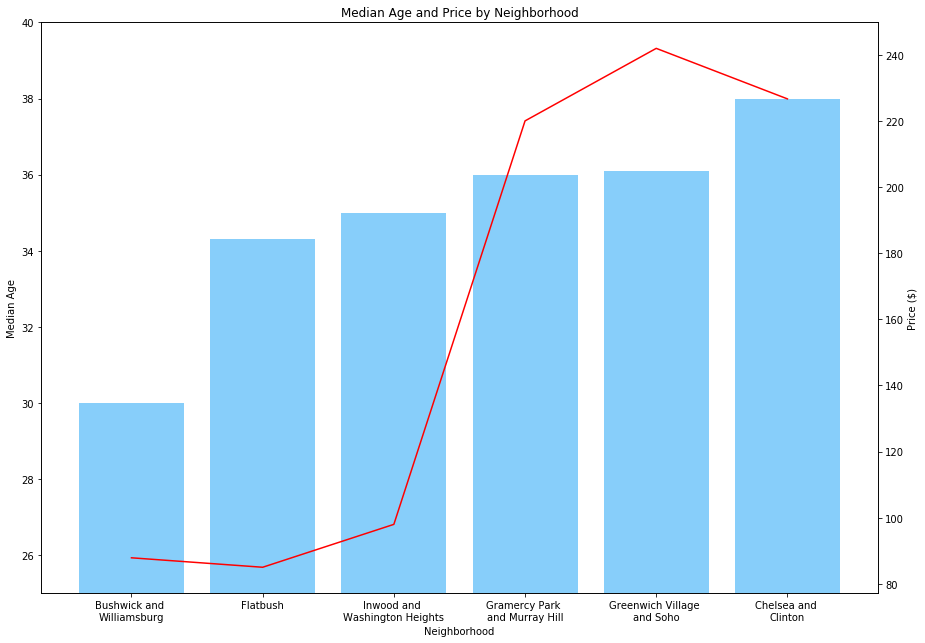

In [97]:
#plot median ages vs price on bar chart
x_axis = np.arange(len(median_age['Median Age']))

fig, ax1 = plt.subplots(figsize=(15,10.5))
ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Median Age')
ax1.set_ylim(25,40)

ax1.xaxis.set_ticklabels(['0','Bushwick and \nWilliamsburg','Flatbush','Inwood and \nWashington Heights',
    'Gramercy Park \nand Murray Hill','Greenwich Village \nand Soho','Chelsea and \nClinton'])

ax2 = ax1.twinx()
ax2.set_ylabel('Price ($)')

ax1.bar(x_axis,median_age['Median Age'],color='lightskyblue')
ax2.plot(x_axis,reordered_means.T['Mean 2018'], color='red')
plt.title('Median Age and Price by Neighborhood')
plt.savefig("Images/MedianAgePricebyNeighborhood.png")

In [79]:
ethnic_df = demo_df[[
    'Neighborhood',
    'Hispanic', 'White', 'Black',
    'Native American', 'Asian', 'Hawaiian/PI', 
    'Other', 'Two or More'
]]
ethnic_df = ethnic_df.set_index('Neighborhood').T
ethnic_df

Neighborhood,Bushwick and Williamsburg,Chelsea and Clinton,Flatbush,Gramercy Park and Murray Hill,Greenwich Village and Soho,Inwood and Washington Heights
Hispanic,84947,19426,20589,7819,2839,153384
White,49668,73650,24359,49084,28050,38922
Black,26063,6939,49067,3094,1023,17086
Native American,184,131,61,197,43,63
Asian,6669,18120,11129,13147,9281,5897
Hawaiian/PI,11,12,11,0,0,95
Other,369,709,974,255,125,584
Two or More,1693,2511,2463,2064,1618,2649


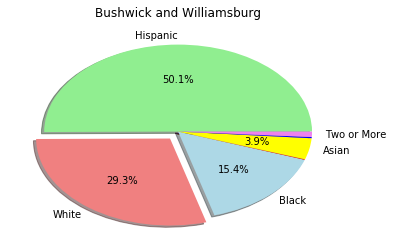

In [62]:
#plot ethnic demographic pie charts
#plot Bushwick and Williamsburg
labels = ['Hispanic','White','Black','','Asian','','','Two or More'] #too little data to show every race
sizes = ethnic_df['Bushwick and Williamsburg']
colors = ['lightgreen','lightcoral','lightblue','red','yellow','coral','blue','violet']
explode = [0,0.1,0,0,0,0,0,0]

#drop any percentages less than 2%
def my_autopct(pct):
    return ("%1.1f%%" % pct) if pct > 2 else ''

plt.pie(sizes,colors=colors,labels = labels,explode = explode,autopct=my_autopct, shadow = True)
plt.title('Bushwick and Williamsburg')
plt.savefig("Images/BushWillRace")

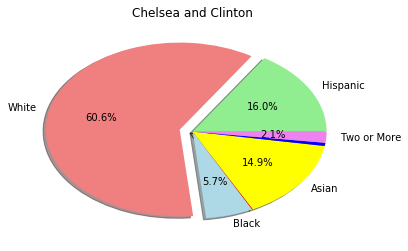

In [63]:
#plot Chelsea and Clinton
#drop any percentages less than 2%
def my_autopct(pct):
    return ("%1.1f%%" % pct) if pct > 2 else ''

sizes = ethnic_df['Chelsea and Clinton']
plt.pie(sizes,colors=colors,labels = labels,explode = explode,autopct=my_autopct, shadow = True)
plt.title('Chelsea and Clinton')
plt.savefig("Images/ChelseaClintonRace")

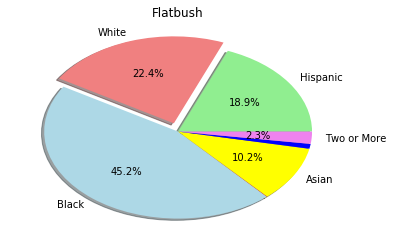

In [64]:
#plot Flatbush
#drop any percentages less than 2%
def my_autopct(pct):
    return ("%1.1f%%" % pct) if pct > 2 else ''

sizes = ethnic_df['Flatbush']
plt.pie(sizes,colors=colors,labels = labels,explode = explode,autopct=my_autopct, shadow = True)
plt.title('Flatbush')
plt.savefig("Images/FlatbushRace")

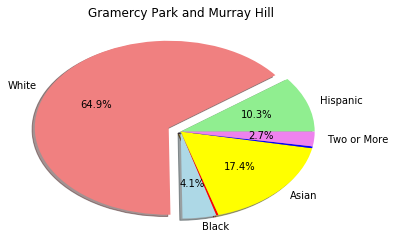

In [65]:
#plot Gramercy Park and Murray Hill
#drop any percentages less than 2%
def my_autopct(pct):
    return ("%1.1f%%" % pct) if pct > 2 else ''

sizes = ethnic_df['Gramercy Park and Murray Hill']
plt.pie(sizes,colors=colors,labels = labels,explode = explode,autopct=my_autopct, shadow = True)
plt.title('Gramercy Park and Murray Hill')
plt.savefig("Images/GramercyMurrayRace")

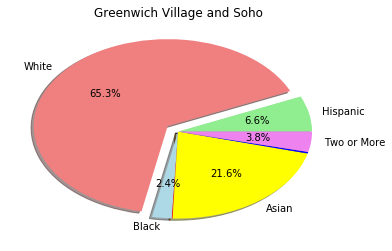

In [66]:
#plot Greenwich Village and Soho
#drop any percentages less than 2%
def my_autopct(pct):
    return ("%1.1f%%" % pct) if pct > 2 else ''

sizes = ethnic_df['Greenwich Village and Soho']
plt.pie(sizes,colors=colors,labels = labels,explode = explode,autopct=my_autopct, shadow = True)
plt.title('Greenwich Village and Soho')
plt.savefig("Images/GreenwichSohoRace")

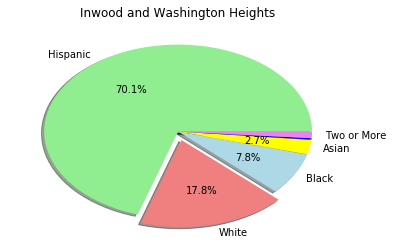

In [67]:
#plot Inwood and Washington Heights
#drop any percentages less than 2%
def my_autopct(pct):
    return ("%1.1f%%" % pct) if pct > 2 else ''

sizes = ethnic_df['Inwood and Washington Heights']
plt.pie(sizes,colors=colors,labels = labels,explode = explode,autopct=my_autopct, shadow = True)
plt.title('Inwood and Washington Heights')
plt.savefig("Images/InWashRace")

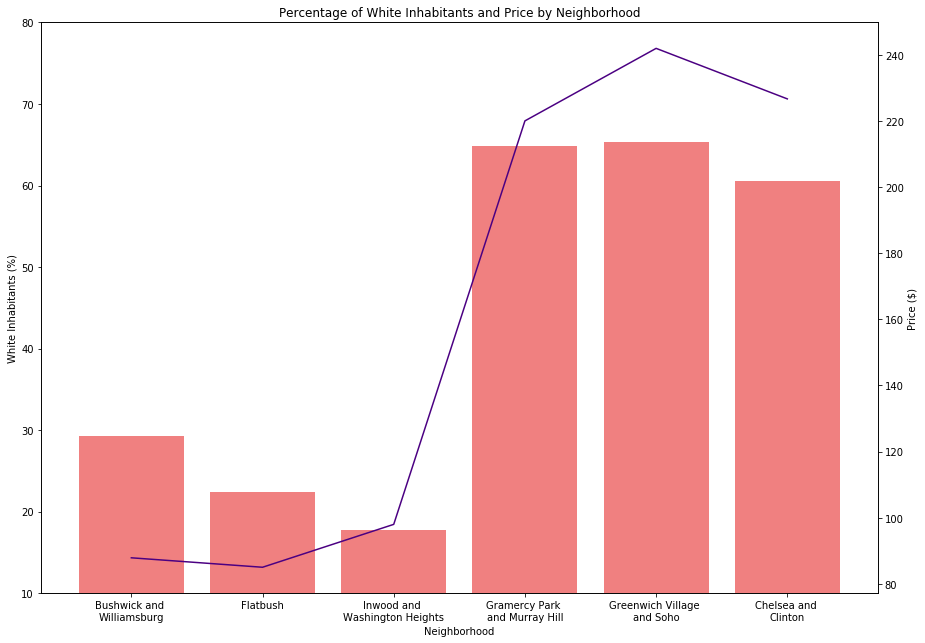

In [100]:
#plot percentage of white people vs price on bar chart
x_axis = np.arange(len(median_age['Median Age']))

fig, ax1 = plt.subplots(figsize=(15,10.5))
ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('White Inhabitants (%)')
white_percent = [29.3,22.4,17.8,64.9,65.3,60.6]
ax1.set_ylim(10,80)

ax1.xaxis.set_ticklabels(['0','Bushwick and \nWilliamsburg','Flatbush','Inwood and \nWashington Heights',
    'Gramercy Park \nand Murray Hill','Greenwich Village \nand Soho','Chelsea and \nClinton'])

ax2 = ax1.twinx()
ax2.set_ylabel('Price ($)')

ax1.bar(x_axis,white_percent,color='lightcoral')
ax2.plot(x_axis,reordered_means.T['Mean 2018'], color='indigo')
plt.title('Percentage of White Inhabitants and Price by Neighborhood')
plt.savefig("Images/PercentageWhitePricebyNeighborhood")

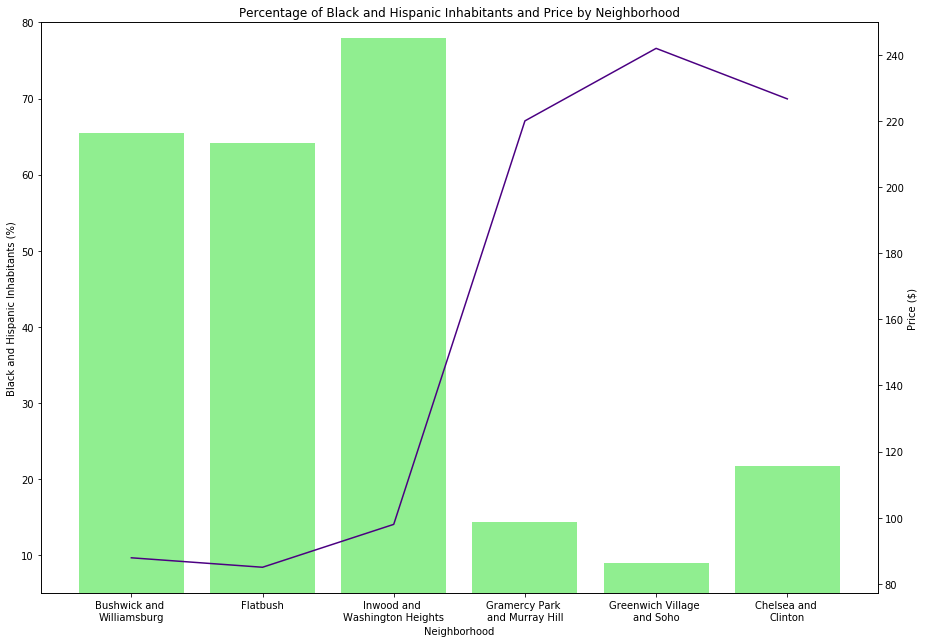

In [101]:
#plot percentage of black and brown people vs price on bar chart
x_axis = np.arange(len(median_age['Median Age']))

fig, ax1 = plt.subplots(figsize=(15,10.5))
ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Black and Hispanic Inhabitants (%)')
white_percent = [65.5,64.1,77.9,14.4,9,21.7]
ax1.set_ylim(5,80)

ax1.xaxis.set_ticklabels(['0','Bushwick and \nWilliamsburg','Flatbush','Inwood and \nWashington Heights',
    'Gramercy Park \nand Murray Hill','Greenwich Village \nand Soho','Chelsea and \nClinton'])

ax2 = ax1.twinx()
ax2.set_ylabel('Price ($)')

ax1.bar(x_axis,white_percent,color='lightgreen')
ax2.plot(x_axis,reordered_means.T['Mean 2018'], color='indigo')
plt.title('Percentage of Black and Hispanic Inhabitants and Price by Neighborhood')
plt.savefig("Images/PercentageBlackHispanicPricebyNeighborhood")